# **DS219 assignment 5**
Collaborated with Rigpea Wangchuk and received help from ChatGPT for generating graphs.

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

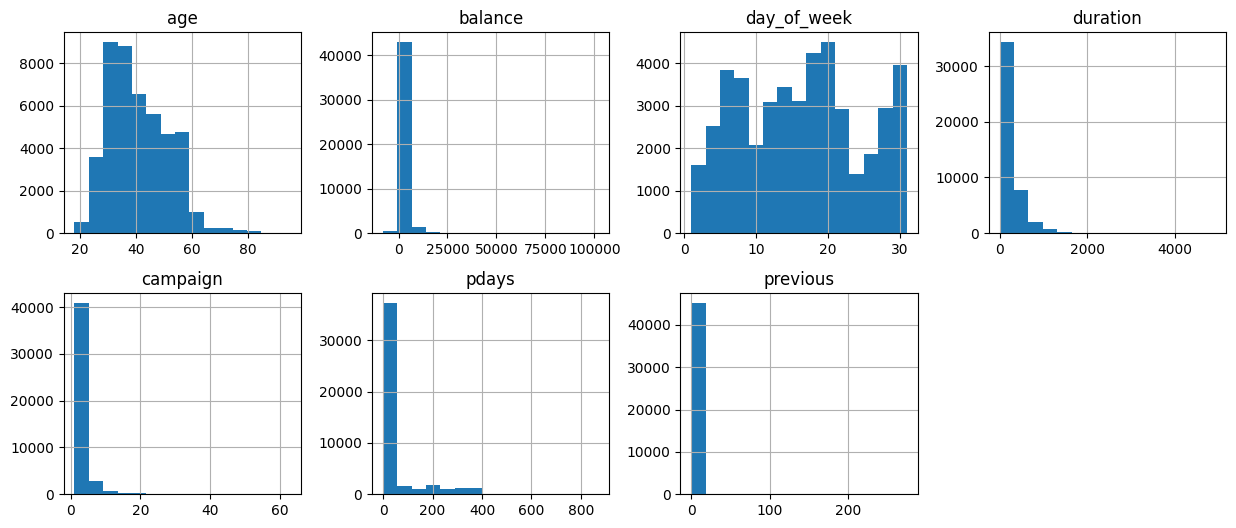

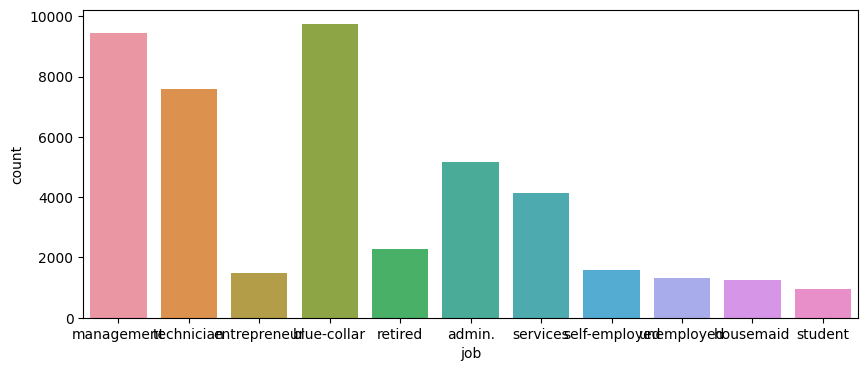

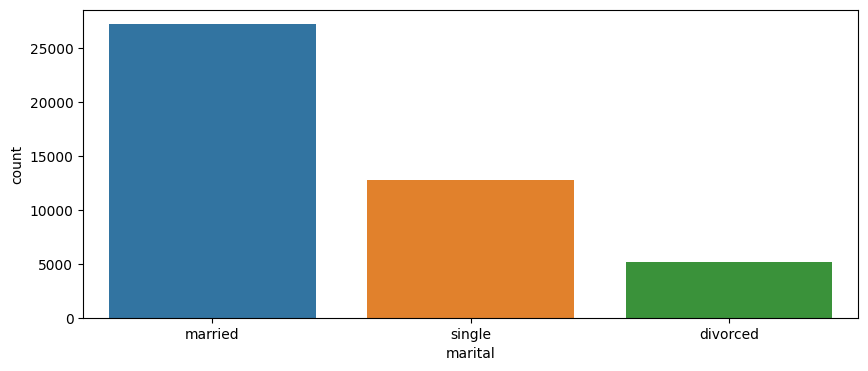

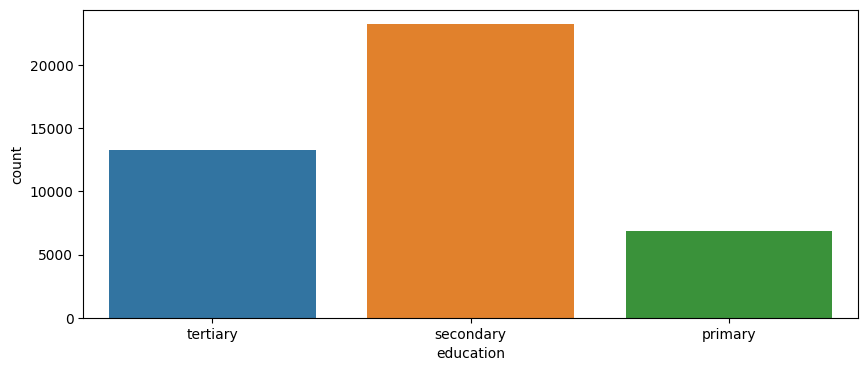

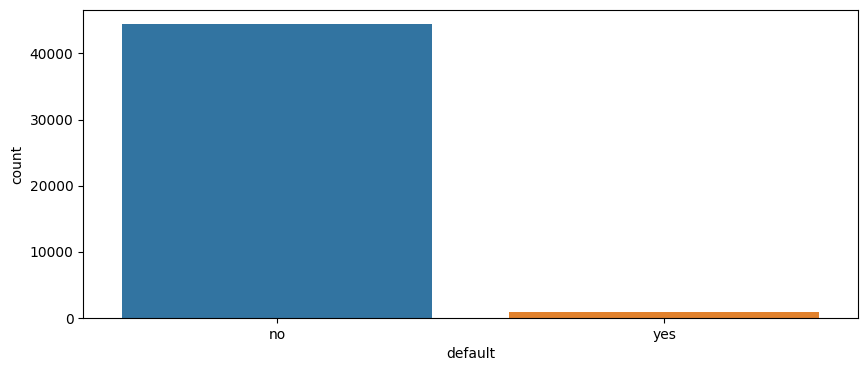

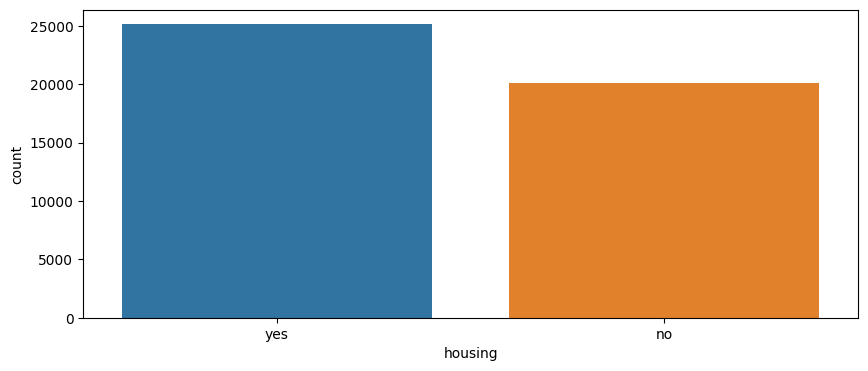

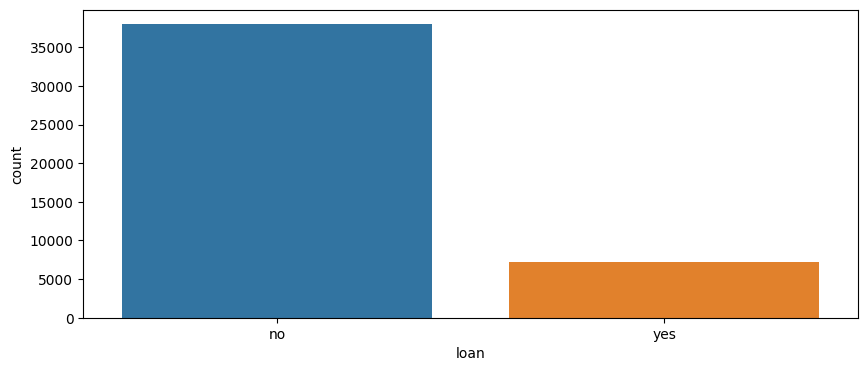

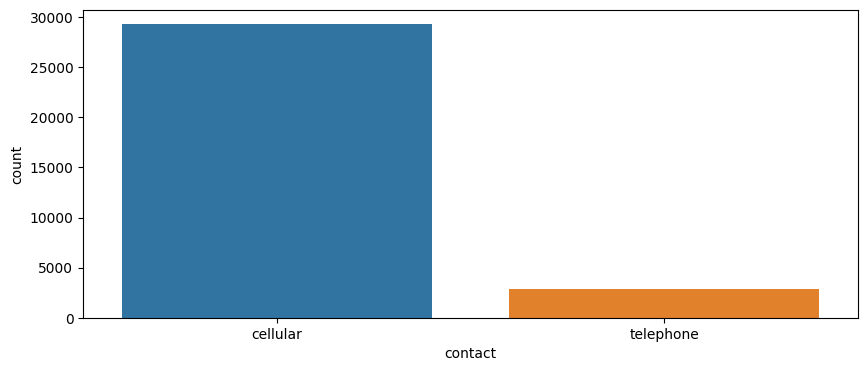

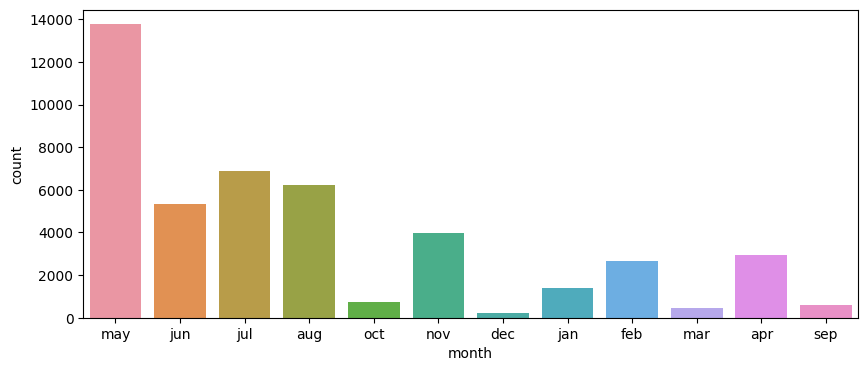

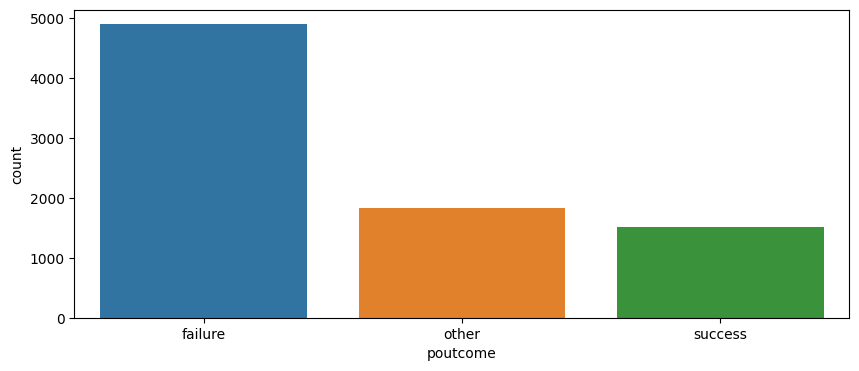

In [12]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Importing the dataset
# Replace 'your_dataset_url' with the actual URL or file path
# url = 'your_dataset_url'
# df = pd.read_csv(url)

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


# Exploratory Data Analysis (EDA)
# Explore the dataset's structure and summary statistics

print("Data analysis:")
print("Head:")
print()
print(X.head())
print()
print(X.describe())
print()
print(X.isnull().sum())
print()
print(X.dtypes)
print()

# Visualize key features using plots

numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=X)
    plt.show()


**Hypothesis Formulation**
1. There is a correlation between age and subscription.
2. There is a weak correlation between contact duration and subscription.

**Hypothesis testing**

<ipython-input-15-d59daff27756>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].squeeze()
<ipython-input-15-d59daff27756>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration'] = X['duration'].squeeze()


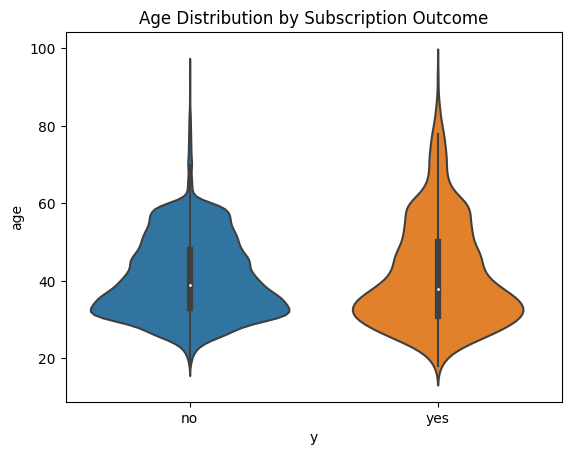

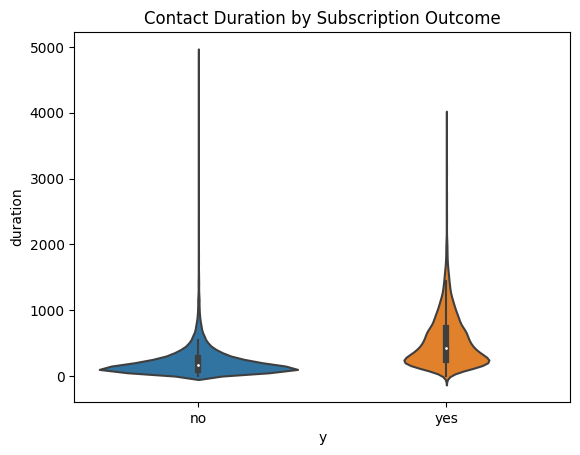

In [15]:
y = y.squeeze()

X['age'] = X['age'].squeeze()
X['duration'] = X['duration'].squeeze()

sns.violinplot(x=y, y=X['age'])
plt.title('Age Distribution by Subscription Outcome')
plt.show()

sns.violinplot(x=y, y=X['duration'])
plt.title('Contact Duration by Subscription Outcome')
plt.show()

**Discussing the results**
1. After testing my hypothesis for age vs subscription outcome, there seems to be a very weak correlation between the two, as the age does not seem to affect the subscription distribution at all, giving a similar graph for both "yes" and "no".
2. After testing my hypothesis for contact duration vs subscription outcome, there somewhat seems to be a correlation between the two. There is a distinguishable difference between the distributions for "no" and "yes", meaning there is an effect of one on another.